<a href="https://colab.research.google.com/github/Praharshita23/Elevate_labs_task_5/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading Data**

In [ ]:
data=pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#**Understanding Data**

In [ ]:
data.drop(columns=['PassengerId','Name','Ticket'], inplace=True)


In [ ]:
data.shape

(891, 9)

In [ ]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['Survived'].mean() * 100

np.float64(38.38383838383838)

In [ ]:
data.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
data.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#**Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


##Cleaning data

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Fare')])

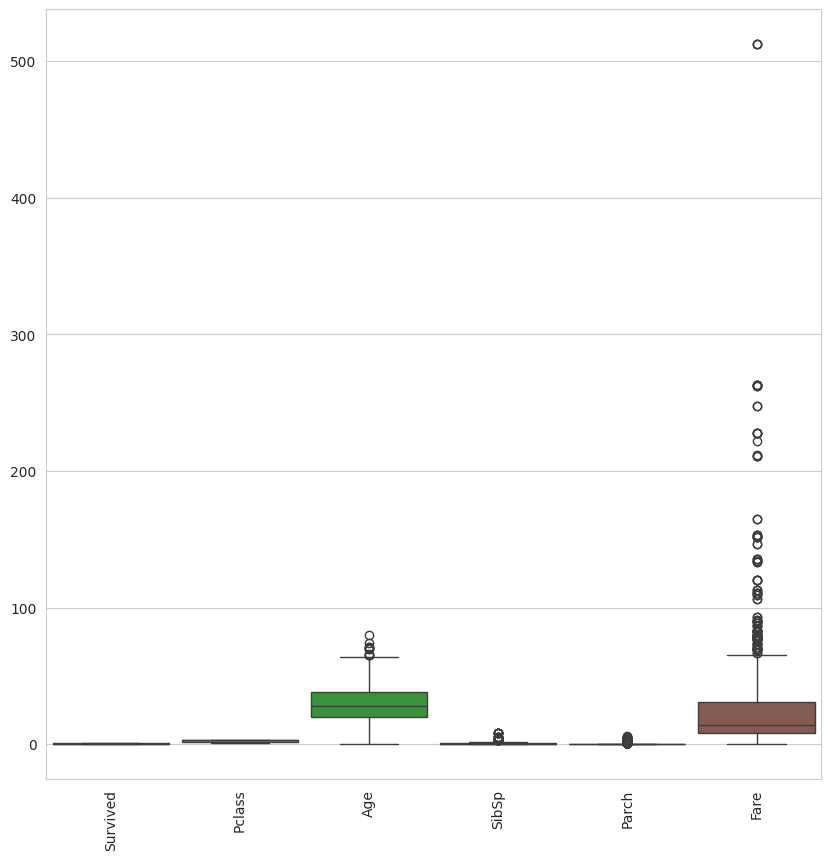

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.9)
plt.xticks(rotation=90)

<Axes: xlabel='Survived'>

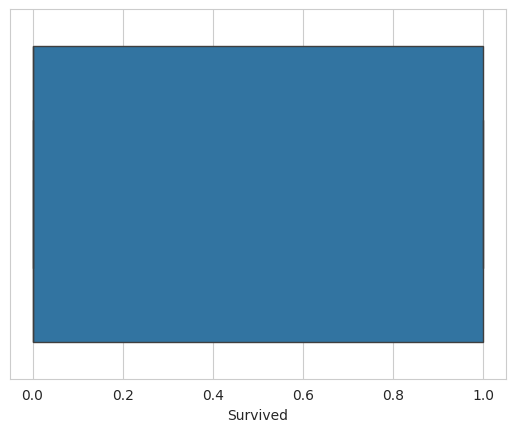

In [ ]:
sns.boxplot(x=data["Survived"])

<Axes: xlabel='Pclass'>

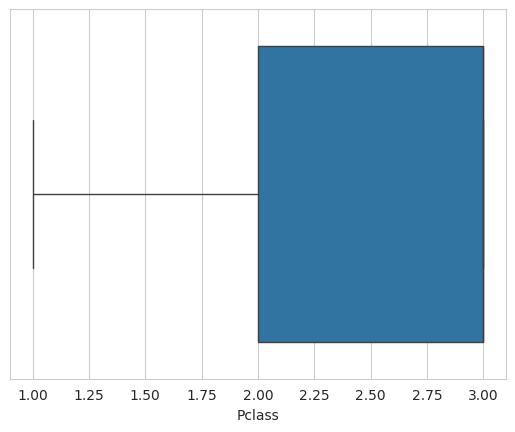

In [ ]:
sns.boxplot(x=data["Pclass"])

<Axes: xlabel='Age'>

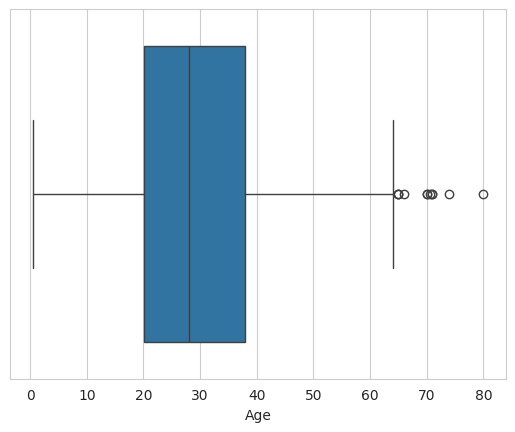

In [ ]:
sns.boxplot(x=data["Age"])

<Axes: xlabel='SibSp'>

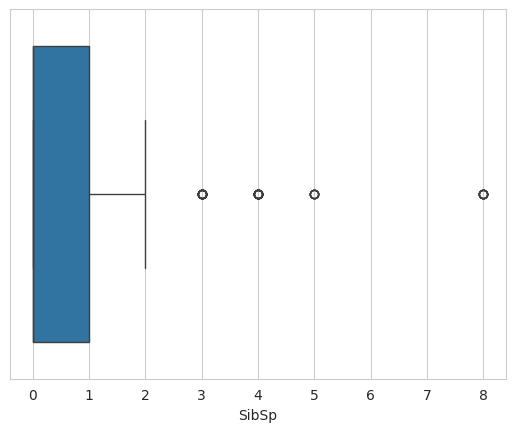

In [ ]:
sns.boxplot(x=data["SibSp"])

<Axes: xlabel='Parch'>

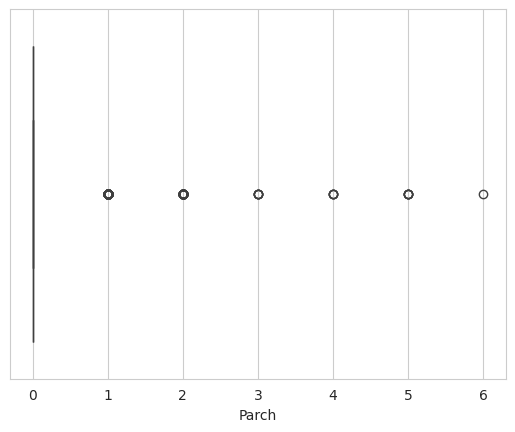

In [ ]:
sns.boxplot(x=data["Parch"])

<Axes: xlabel='Fare'>

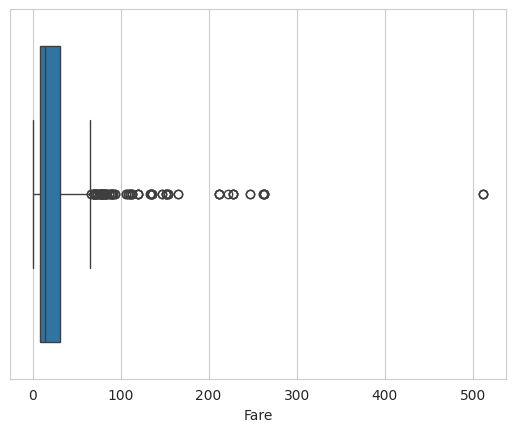

In [ ]:
sns.boxplot(x=data["Fare"])

In [ ]:
Q1 = data["Survived"].quantile(0.25)
Q3 = data["Survived"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered1 = data[(data["Survived"]> lower_limit) & (data["Survived"] < upper_limit)]
data_filtered1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
Q1 = data_filtered1["Pclass"].quantile(0.25)
Q3 = data_filtered1["Pclass"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered2 = data_filtered1[(data_filtered1["Pclass"]> lower_limit) & (data_filtered1["Pclass"] < upper_limit)]
data_filtered2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
Q1 = data_filtered2["Age"].quantile(0.25)
Q3 = data_filtered2["Age"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered3 = data_filtered2[(data_filtered2["Age"]> lower_limit) & (data_filtered2["Age"] < upper_limit)]
data_filtered3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
Q1 = data_filtered3["SibSp"].quantile(0.25)
Q3 = data_filtered3["SibSp"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered4 = data_filtered3[(data_filtered3["SibSp"]> lower_limit) & (data_filtered3["SibSp"] < upper_limit)]
data_filtered4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
Q1 = data_filtered4["Parch"].quantile(0.25)
Q3 = data_filtered4["Parch"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered5 = data_filtered4[(data_filtered4["Parch"]> lower_limit) & (data_filtered4["Parch"] < upper_limit)]
data_filtered5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [ ]:
Q1 = data_filtered5["Fare"].quantile(0.25)
Q3 = data_filtered5["Fare"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered6 = data_filtered5[(data_filtered5["Fare"]> lower_limit) & (data_filtered5["Fare"] < upper_limit)]
data_filtered6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


##Boxplots

<Axes: xlabel='Survived'>

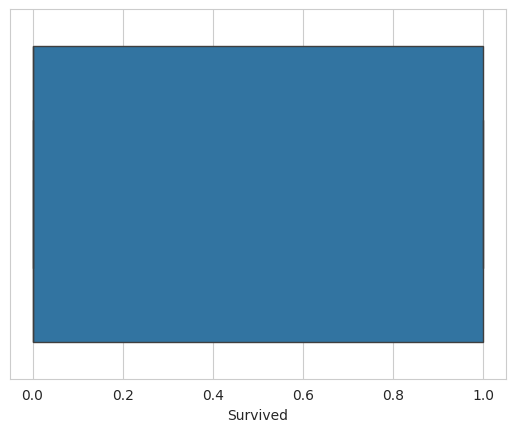

In [ ]:
sns.boxplot(x=data["Survived"])


<Axes: xlabel='Pclass'>

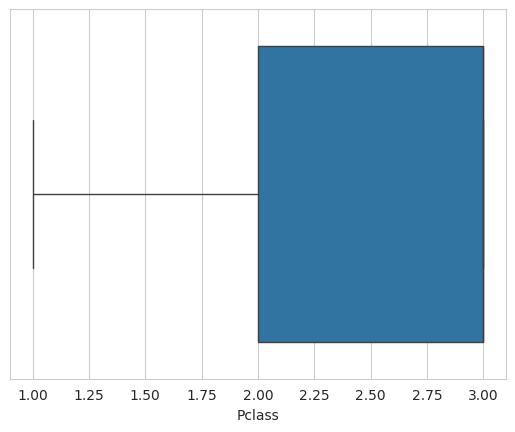

In [ ]:
sns.boxplot(x=data["Pclass"])

<Axes: xlabel='Age'>

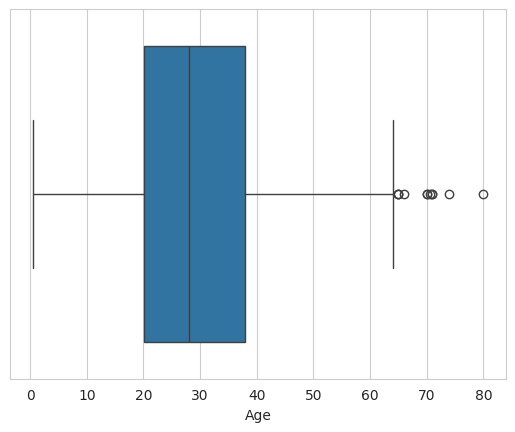

In [ ]:
sns.boxplot(x=data["Age"])

<Axes: xlabel='SibSp'>

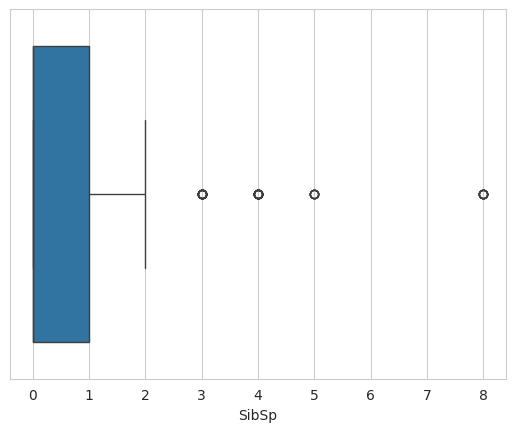

In [ ]:
sns.boxplot(x=data["SibSp"])

<Axes: xlabel='Parch'>

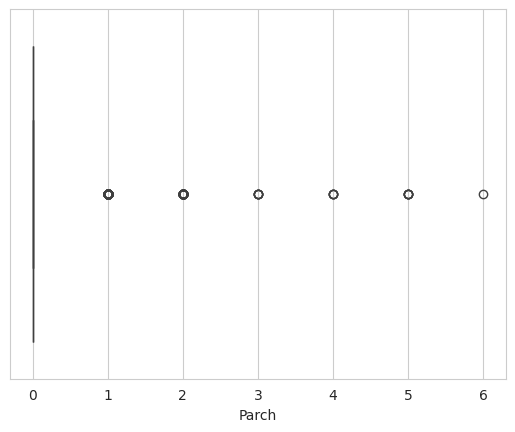

In [ ]:
sns.boxplot(x=data["Parch"])

<Axes: xlabel='Fare'>

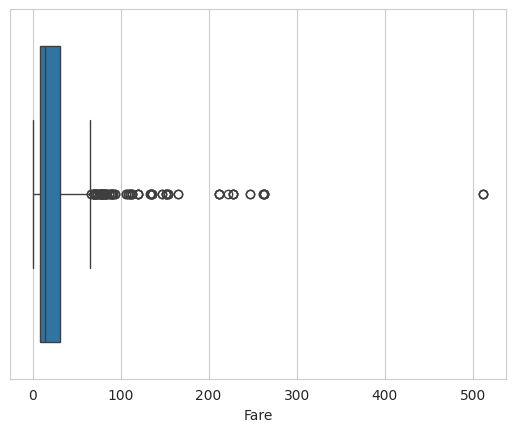

In [ ]:
sns.boxplot(x=data["Fare"])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Parch'),
  Text(5, 0, 'Fare')])

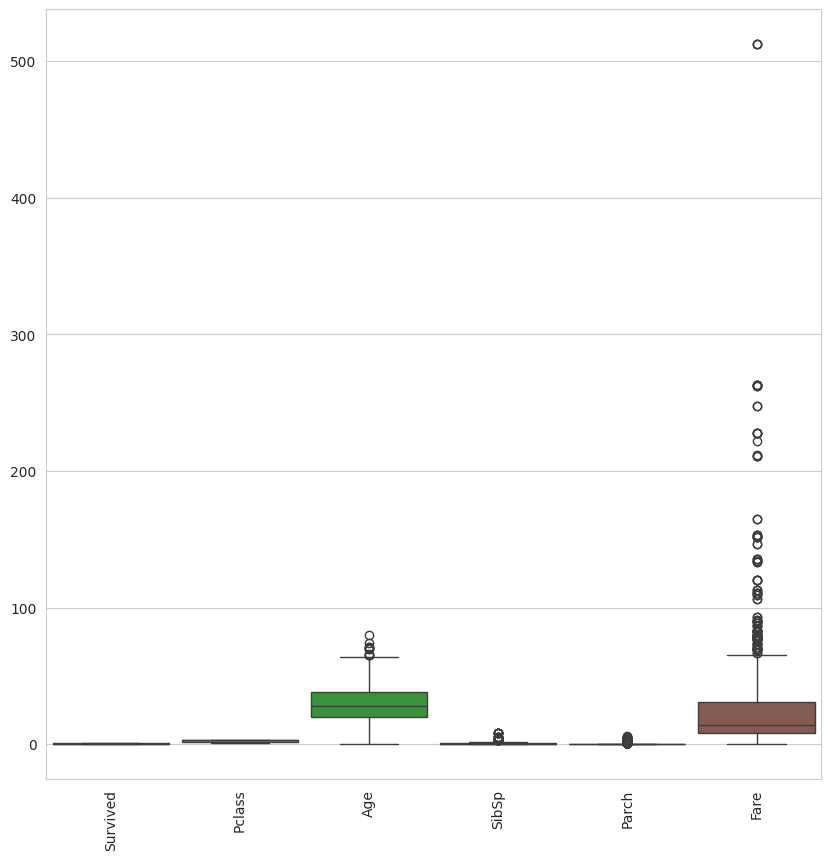

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.9)
plt.xticks(rotation=90)

In [ ]:
data.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2
FamilySize,0
AgeGroup,177


In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [ ]:
data.drop('Cabin', axis=1, inplace=True)

##Histograms

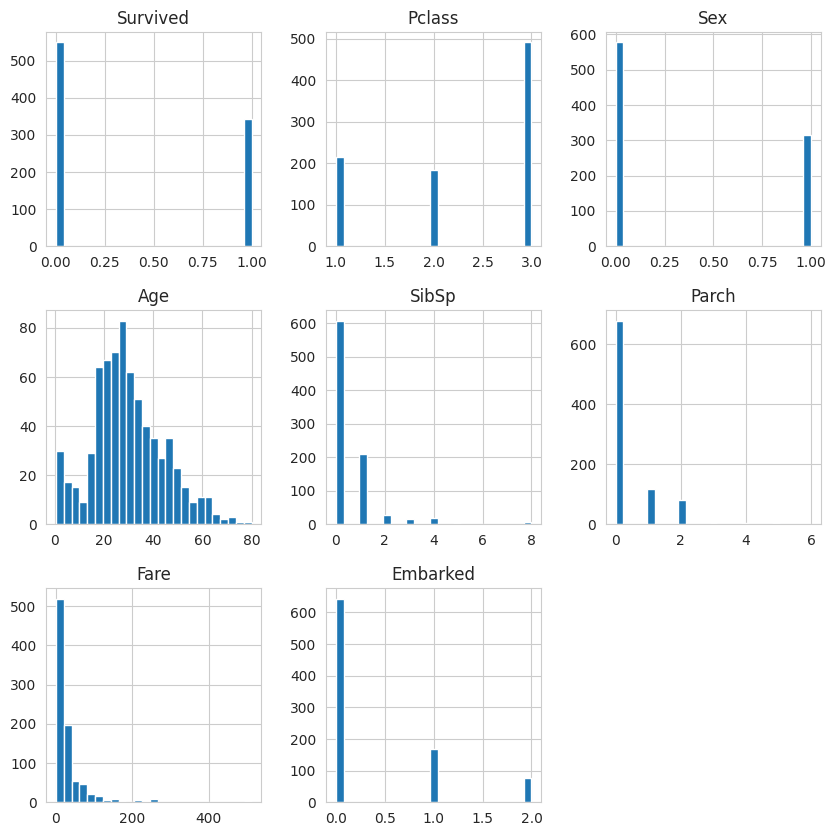

In [ ]:
data.hist(bins=25,figsize=(10,10))
plt.show()

##Heatmap

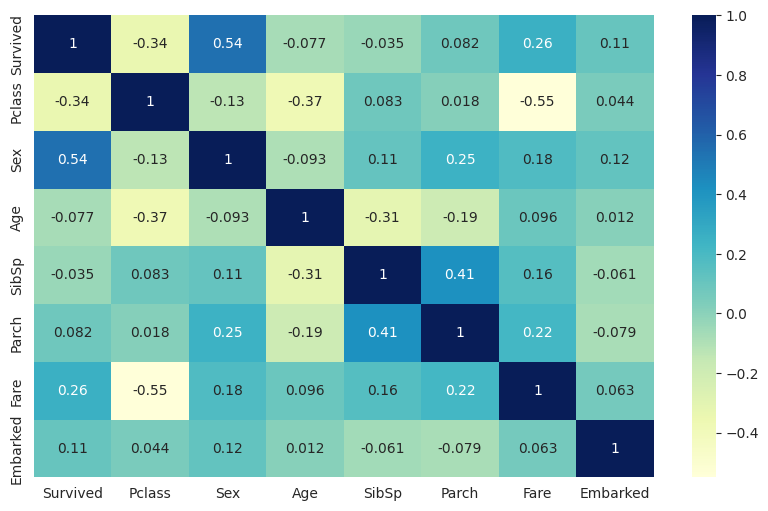

In [ ]:
numeric_df = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.show()


##Pairplot

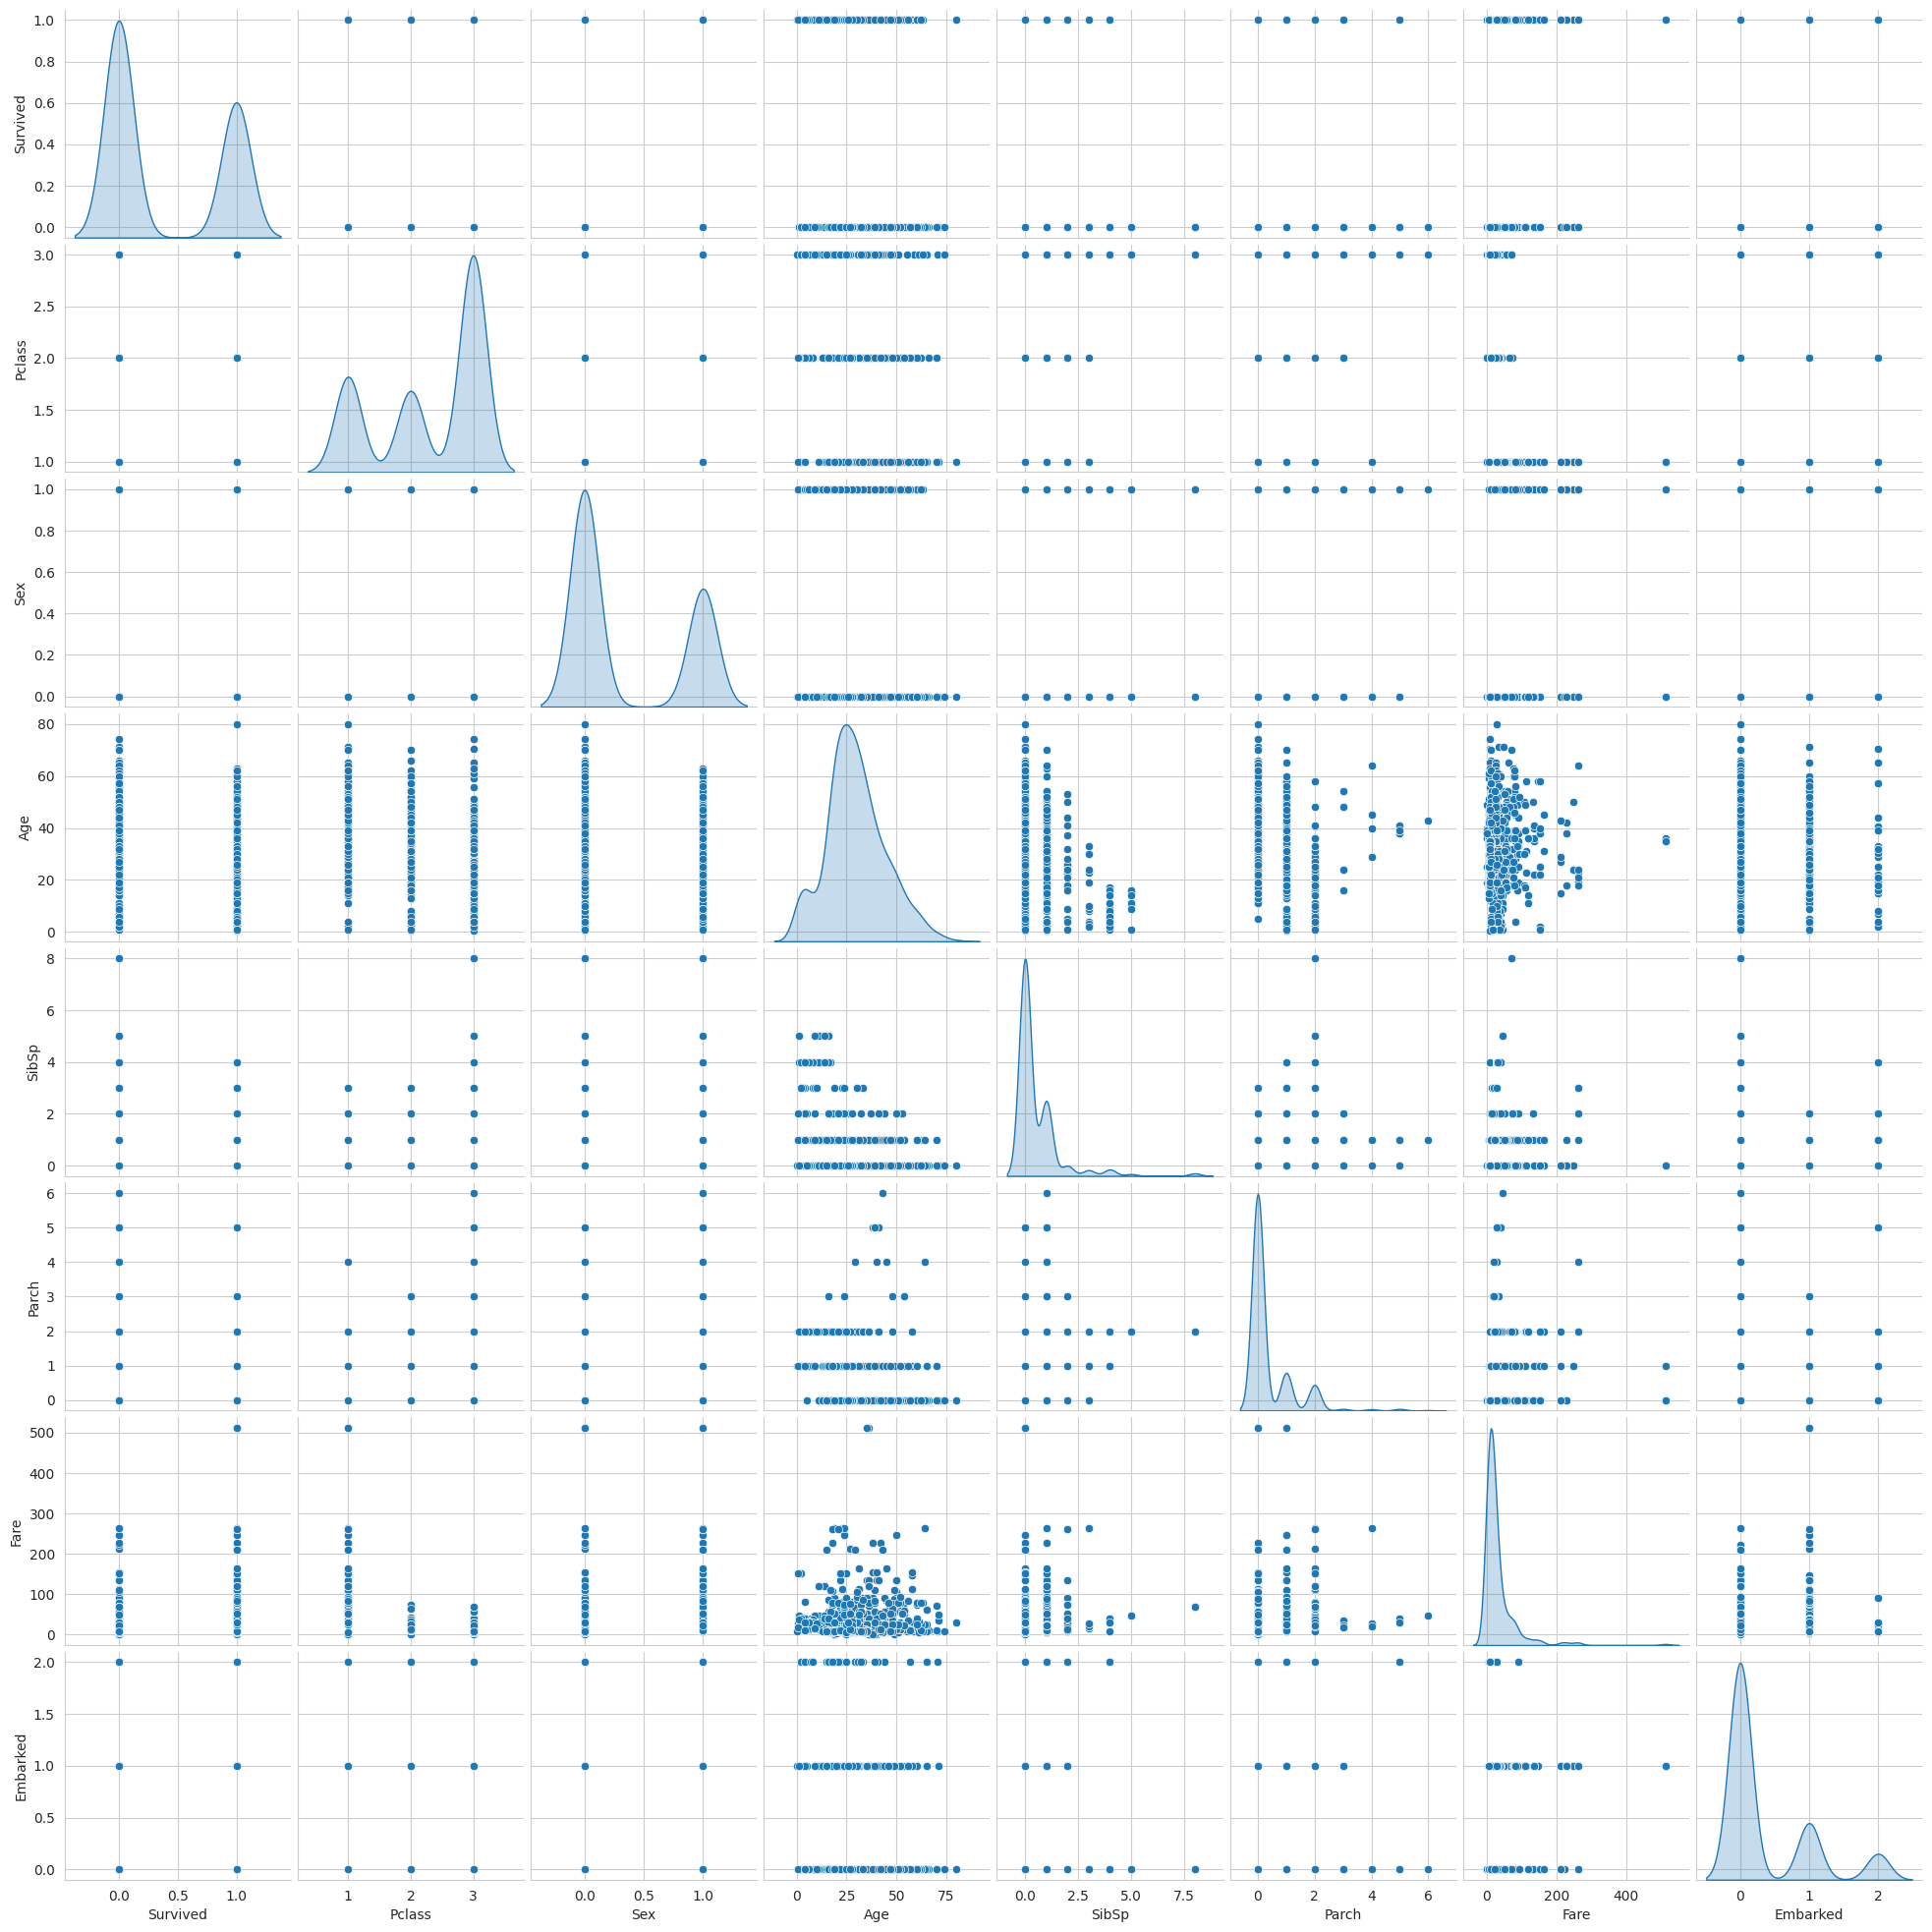

In [ ]:
sns.pairplot(data,diag_kind='kde')
plt.show()

##Scatter Plot

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


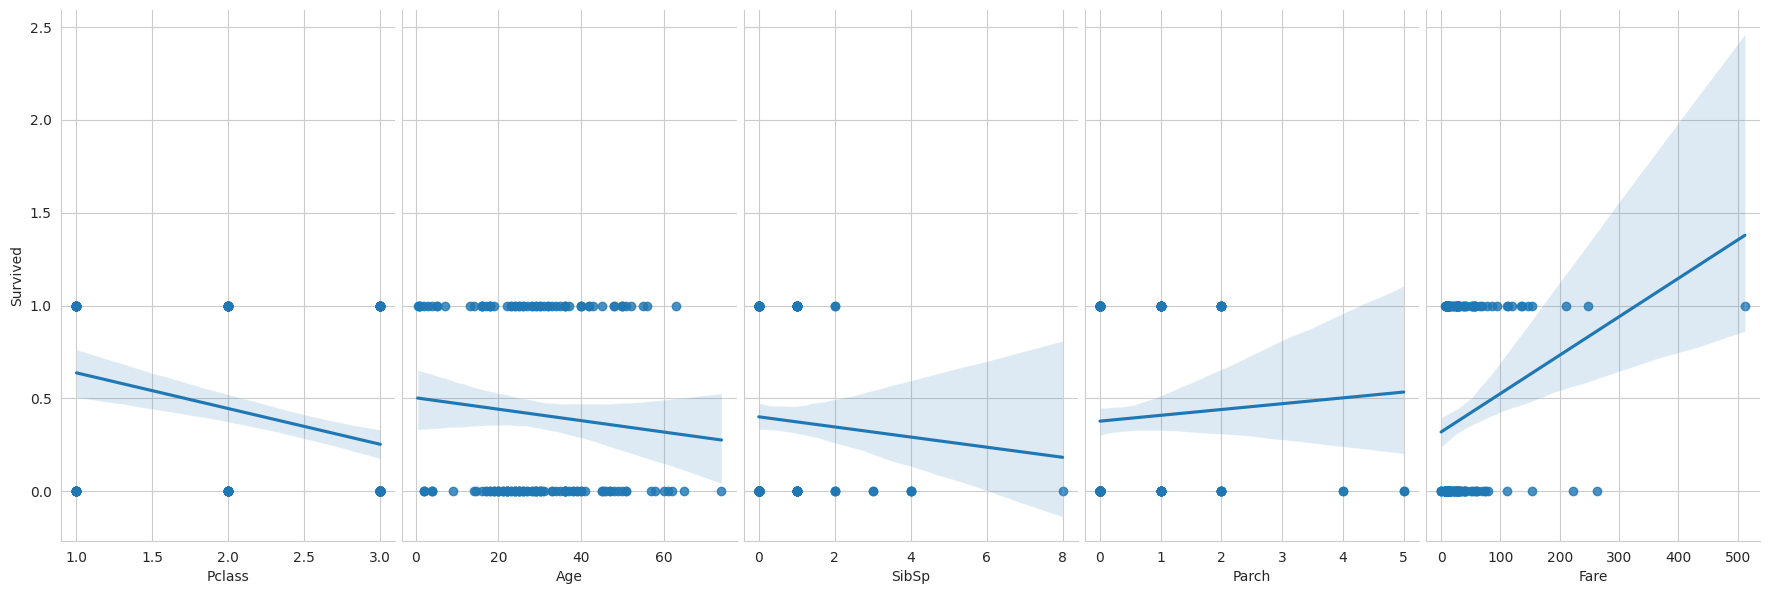

In [ ]:
sns.pairplot(df.sample(200),x_vars=['Pclass','Age','SibSp','Parch','Fare'],y_vars='Survived',size=6,aspect=0.6,kind='reg')

##Survival Count Plot

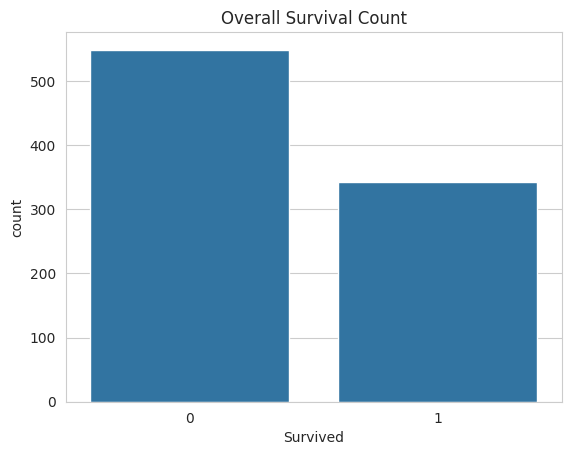

In [ ]:
sns.countplot(x='Survived', data=data)
plt.title("Overall Survival Count")
plt.show()


##Target vs Feature Bar Plots

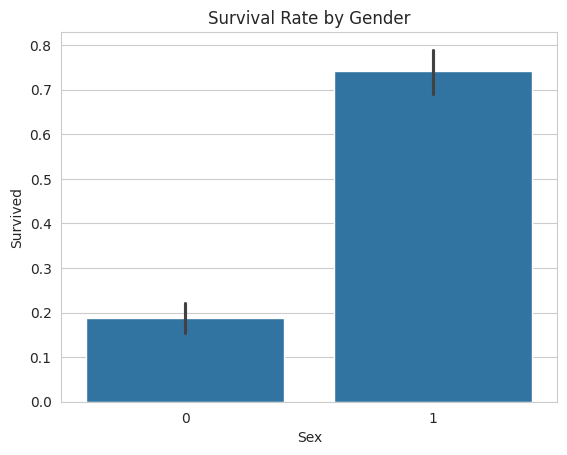

In [ ]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()


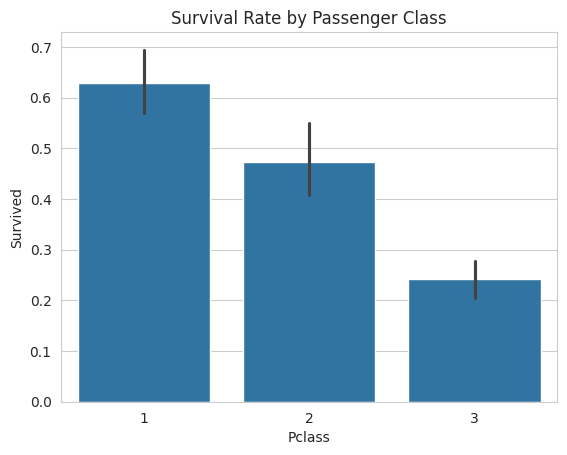

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rate by Passenger Class")
plt.show()


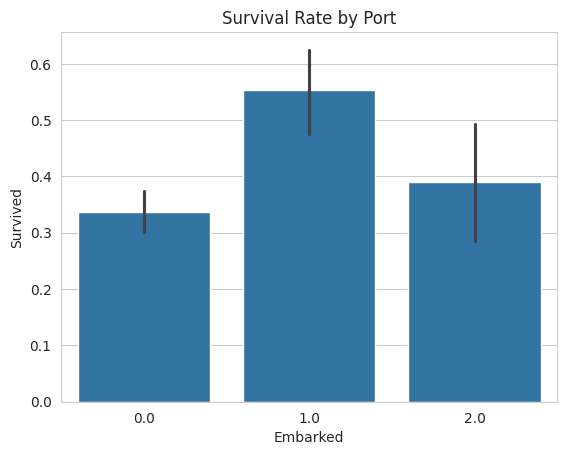

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title("Survival Rate by Port")
plt.show()


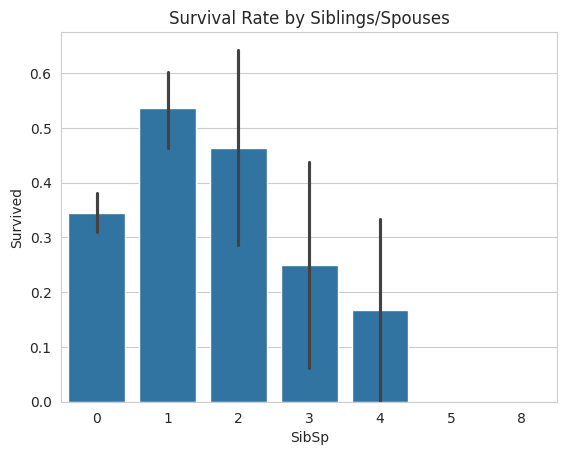

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title("Survival Rate by Siblings/Spouses")
plt.show()


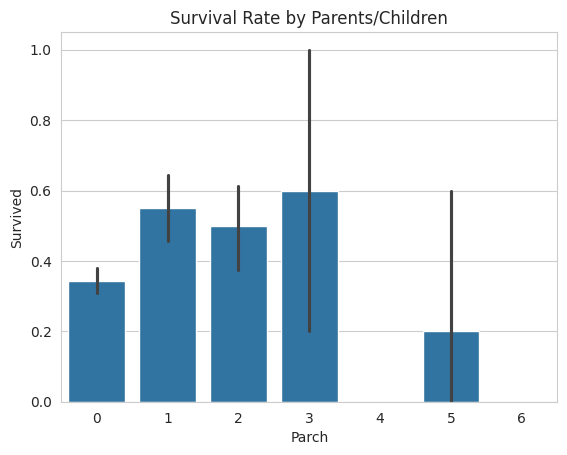

In [ ]:
sns.barplot(x='Parch', y='Survived', data=data)
plt.title("Survival Rate by Parents/Children")
plt.show()


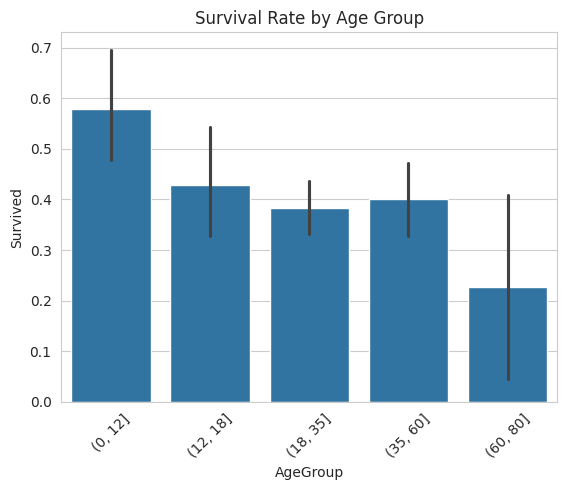

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0,12,18,35,60,80])

sns.barplot(x='AgeGroup', y='Survived', data=data)
plt.xticks(rotation=45)
plt.title("Survival Rate by Age Group")
plt.show()


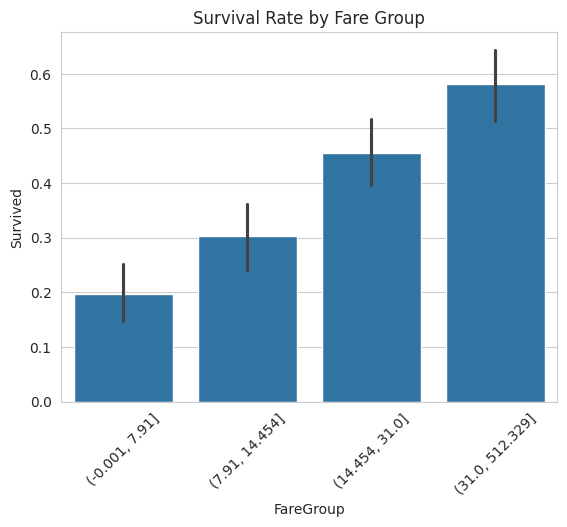

In [ ]:
data['FareGroup'] = pd.qcut(data['Fare'], 4)

sns.barplot(x='FareGroup', y='Survived', data=data)
plt.xticks(rotation=45)
plt.title("Survival Rate by Fare Group")
plt.show()


In [ ]:
data.corr(numeric_only=True)['Survived'].sort_values(ascending=False)


,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.108669
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


<Axes: xlabel='Pclass', ylabel='Survived'>

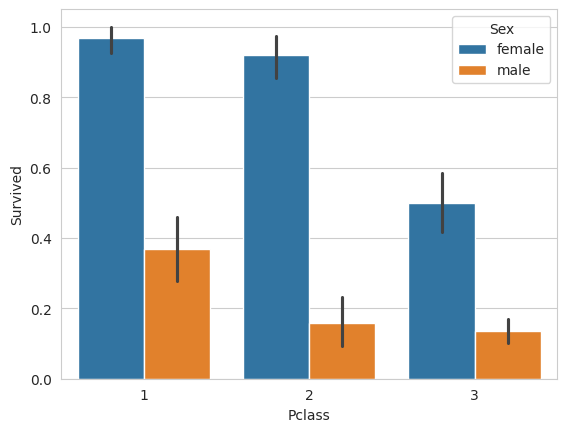

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)


<Axes: xlabel='FamilySize', ylabel='Survived'>

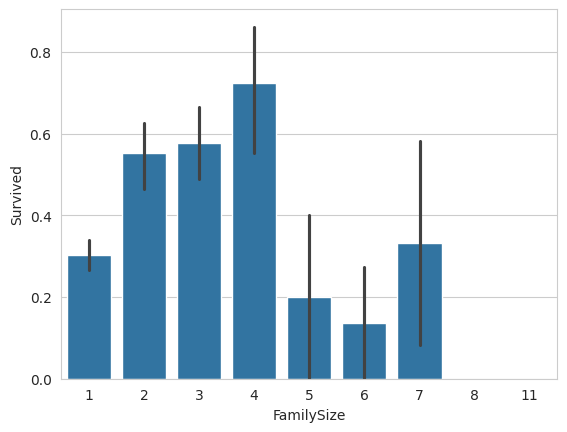

In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)


##Skewness

In [ ]:
data['Fare'].skew()


np.float64(4.787316519674893)

In [ ]:
data['Age'].skew()


np.float64(0.38910778230082704)